In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [62]:
df=pd.read_csv("Transactions.csv")
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2001-165,11,1,مبايعات,Sales,بيع,Sell,24-02-2001,1,أرض,...,NaN,0,1393.55,1350000.0,968.75,NaN,NaN,1.0,1.0,0.0
1,3-9-2004-223,9,3,هبات,Gifts,هبه,Grant,13-12-2004,4,فيلا,...,NaN,0,1728.00,2790000.0,1614.58,NaN,NaN,1.0,1.0,0.0
2,2-13-1996-119,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,12-03-2001,1,أرض,...,NaN,0,929.03,20000000.0,21527.83,NaN,NaN,1.0,1.0,0.0
3,2-14-2005-222,14,2,رهون,Mortgages,تعديل رهن,Modify Mortgage,20-09-2005,2,مبنى,...,NaN,0,2673.28,25000000.0,9351.81,NaN,NaN,1.0,1.0,0.0
4,3-9-2012-874,9,3,هبات,Gifts,هبه,Grant,11-10-2012,4,فيلا,...,NaN,0,1541.17,9000000.0,5839.72,NaN,NaN,1.0,1.0,0.0


In [52]:
#understand the data
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047965 entries, 0 to 1047964
Data columns (total 46 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1047965 non-null  object 
 1   procedure_id          1047965 non-null  int64  
 2   trans_group_id        1047965 non-null  int64  
 3   trans_group_ar        1047965 non-null  object 
 4   trans_group_en        1047965 non-null  object 
 5   procedure_name_ar     1047965 non-null  object 
 6   procedure_name_en     1047965 non-null  object 
 7   instance_date         1047960 non-null  object 
 8   property_type_id      1047965 non-null  int64  
 9   property_type_ar      1047965 non-null  object 
 10  property_type_en      1047965 non-null  object 
 11  property_sub_type_id  807819 non-null   float64
 12  property_sub_type_ar  807819 non-null   object 
 13  property_sub_type_en  807819 non-null   object 
 14  property_usage_ar     1047965 non-

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_ar',
       'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
       'instance_date', 'property_type_id', 'property_type_ar',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
       'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
       'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
       'area_name_en', 'building_name_ar', 'building_name_en',
       'project_number', 'project_name_ar', 'project_name_en',
       'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
       'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
       'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
       'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price',
       'rent_value', 'meter_rent_price', 'no_of_parties_role_1',
       'no_of_parties_role_2', 'no_of_parties_role_3'],
      dtype='object')

In [63]:
df['instance_date'] = pd.to_datetime(df['instance_date'], errors='coerce')

In [64]:
#Missing Values
df.isnull().sum()

transaction_id                0
procedure_id                  0
trans_group_id                0
trans_group_ar                0
trans_group_en                0
procedure_name_ar             0
procedure_name_en             0
instance_date                 5
property_type_id              0
property_type_ar              0
property_type_en              0
property_sub_type_id     240146
property_sub_type_ar     240146
property_sub_type_en     240146
property_usage_ar             0
property_usage_en             0
reg_type_id                   0
reg_type_ar                   0
reg_type_en                   0
area_id                       0
area_name_ar                  0
area_name_en                  0
building_name_ar         328165
building_name_en         326895
project_number           390593
project_name_ar          390593
project_name_en          390593
master_project_en        183812
master_project_ar        183859
nearest_landmark_ar      125724
nearest_landmark_en      125724
nearest_

In [26]:
df.isnull().mean() * 100

transaction_id           0.000000
procedure_id             0.000000
trans_group_id           0.000000
trans_group_ar           0.000000
trans_group_en           0.000000
procedure_name_ar        0.000000
procedure_name_en        0.000000
instance_date            0.000477
property_type_id         0.000000
property_type_ar         0.000000
property_type_en         0.000000
property_sub_type_id    22.915460
property_sub_type_ar    22.915460
property_sub_type_en    22.915460
property_usage_ar        0.000000
property_usage_en        0.000000
reg_type_id              0.000000
reg_type_ar              0.000000
reg_type_en              0.000000
area_id                  0.000000
area_name_ar             0.000000
area_name_en             0.000000
building_name_ar        31.314500
building_name_en        31.193313
project_number          37.271569
project_name_ar         37.271569
project_name_en         37.271569
master_project_en       17.539899
master_project_ar       17.544384
nearest_landma

In [27]:
p1=df['property_sub_type_en'].unique()
p1

array([nan, 'Villa', 'Building', 'Flat', 'Shop', 'Office',
       'Hotel Apartment', 'Workshop', 'Hotel Rooms', 'Stacked Townhouses',
       'Warehouse', 'Sized Partition', 'Clinic', 'Store', 'Gymnasium',
       'Hotel', 'Show Rooms', 'Parking'], dtype=object)

In [53]:
df.drop(['rent_value', 'meter_rent_price'], axis=1, inplace=True)
df['property_sub_type_en'] = df['property_sub_type_en'].fillna('Unknown')
df['property_sub_type_ar'] = df['property_sub_type_ar'].fillna('Unknown')
max_id = df['property_sub_type_id'].max()
df['property_sub_type_id'] = df['property_sub_type_id'].fillna(max_id + 1).astype(int)
df['building_name_ar'] = df['building_name_ar'].fillna('Unknown')
df['building_name_en'] = df['building_name_en'].fillna('Unknown')
df['property_sub_type_en'] = df['property_sub_type_en'].fillna('Unknown')
df['master_project_en']=df['master_project_en'].fillna('Unknown')
df['master_project_ar']=df['master_project_ar'].fillna('Unknown')
df['project_name_en']=df['project_name_en'].fillna('Unknown')
df['project_name_ar']=df['project_name_ar'].fillna('Unknown')
df['nearest_landmark_en']=df['nearest_landmark_en'].fillna('Unknown')
df['nearest_landmark_ar']=df['nearest_landmark_ar'].fillna('Unknown')
df['nearest_mall_ar']=df['nearest_mall_ar'].fillna('Unknown')
df['nearest_mall_en']=df['nearest_mall_en'].fillna('Unknown')
df['nearest_metro_en']=df['nearest_metro_en'].fillna('Unknown')
df['nearest_metro_ar']=df['nearest_metro_ar'].fillna('Unknown')
df.dropna(subset=['instance_date','actual_worth','no_of_parties_role_1','no_of_parties_role_2','no_of_parties_role_3','rooms_ar','rooms_en','project_number'],inplace=True)

In [26]:
df['actual_worth'].unique()

array([ 1350000.,  2790000., 20000000., ..., 36511425.,  3566914.,
        2327084.])

In [65]:
def parse_rooms(value):
    if pd.isnull(value):
        return ('Unknown',-1)
    
    value = value.strip().upper()
    
    if 'B/R' in value:
        try:
            num = int(value.split(' ')[0])
            return ('Bedroom', num)
        except:
            return ('Bedroom', -1)
    elif 'STUDIO' in value:
        return ('Studio', 0)
    elif 'SINGLE ROOM' in value:
        return ('Single Room', 1)
    elif 'PENTHOUSE' in value:
        return ('Penthouse', -1)
    elif 'OFFICE' in value:
        return ('Office', -1)
    elif 'SHOP' in value:
        return ('Shop', -1)
    elif 'STORE' in value:
        return ('Store', -1)
    elif 'GYM' in value:
        return ('Gym', -1)
    else:
        return ('Other', -1)
    
df[['room_type', 'num_rooms']] = df['rooms_en'].apply(parse_rooms).apply(pd.Series)


In [8]:
df.info()
df.describe()
df.column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047965 entries, 0 to 1047964
Data columns (total 46 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1047965 non-null  object 
 1   procedure_id          1047965 non-null  int64  
 2   trans_group_id        1047965 non-null  int64  
 3   trans_group_ar        1047965 non-null  object 
 4   trans_group_en        1047965 non-null  object 
 5   procedure_name_ar     1047965 non-null  object 
 6   procedure_name_en     1047965 non-null  object 
 7   instance_date         1047960 non-null  object 
 8   property_type_id      1047965 non-null  int64  
 9   property_type_ar      1047965 non-null  object 
 10  property_type_en      1047965 non-null  object 
 11  property_sub_type_id  1047965 non-null  int64  
 12  property_sub_type_ar  1047965 non-null  object 
 13  property_sub_type_en  1047965 non-null  object 
 14  property_usage_ar     1047965 non-

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_ar',
       'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
       'instance_date', 'property_type_id', 'property_type_ar',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
       'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
       'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
       'area_name_en', 'building_name_ar', 'building_name_en',
       'project_number', 'project_name_ar', 'project_name_en',
       'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
       'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
       'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
       'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price',
       'no_of_parties_role_1', 'no_of_parties_role_2', 'no_of_parties_role_3',
       'room_type', 'num_rooms'],
      dtype='object')

In [22]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,room_type,num_rooms
0,1-11-2001-165,11,1,مبايعات,Sales,بيع,Sell,24-02-2001,1,أرض,...,NaN,0,1393.55,1350000.0,968.75,1.0,1.0,0.0,Unknown,NaN
1,3-9-2004-223,9,3,هبات,Gifts,هبه,Grant,13-12-2004,4,فيلا,...,NaN,0,1728.00,2790000.0,1614.58,1.0,1.0,0.0,Unknown,NaN
2,2-13-1996-119,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,12-03-2001,1,أرض,...,NaN,0,929.03,20000000.0,21527.83,1.0,1.0,0.0,Unknown,NaN
3,2-14-2005-222,14,2,رهون,Mortgages,تعديل رهن,Modify Mortgage,20-09-2005,2,مبنى,...,NaN,0,2673.28,25000000.0,9351.81,1.0,1.0,0.0,Unknown,NaN
4,3-9-2012-874,9,3,هبات,Gifts,هبه,Grant,11-10-2012,4,فيلا,...,NaN,0,1541.17,9000000.0,5839.72,1.0,1.0,0.0,Unknown,NaN


In [55]:
df.isnull().mean() * 100

transaction_id          0.0
procedure_id            0.0
trans_group_id          0.0
trans_group_ar          0.0
trans_group_en          0.0
procedure_name_ar       0.0
procedure_name_en       0.0
instance_date           0.0
property_type_id        0.0
property_type_ar        0.0
property_type_en        0.0
property_sub_type_id    0.0
property_sub_type_ar    0.0
property_sub_type_en    0.0
property_usage_ar       0.0
property_usage_en       0.0
reg_type_id             0.0
reg_type_ar             0.0
reg_type_en             0.0
area_id                 0.0
area_name_ar            0.0
area_name_en            0.0
building_name_ar        0.0
building_name_en        0.0
project_number          0.0
project_name_ar         0.0
project_name_en         0.0
master_project_en       0.0
master_project_ar       0.0
nearest_landmark_ar     0.0
nearest_landmark_en     0.0
nearest_metro_ar        0.0
nearest_metro_en        0.0
nearest_mall_ar         0.0
nearest_mall_en         0.0
rooms_ar            

In [56]:
df.drop('project_number', axis=1, inplace=True)

In [57]:
df.drop(['rooms_ar','rooms_en'], axis=1, inplace=True)

In [11]:
df.isnull().mean() * 100

transaction_id          0.0
procedure_id            0.0
trans_group_id          0.0
trans_group_ar          0.0
trans_group_en          0.0
procedure_name_ar       0.0
procedure_name_en       0.0
instance_date           0.0
property_type_id        0.0
property_type_ar        0.0
property_type_en        0.0
property_sub_type_id    0.0
property_sub_type_ar    0.0
property_sub_type_en    0.0
property_usage_ar       0.0
property_usage_en       0.0
reg_type_id             0.0
reg_type_ar             0.0
reg_type_en             0.0
area_id                 0.0
area_name_ar            0.0
area_name_en            0.0
building_name_ar        0.0
building_name_en        0.0
project_name_ar         0.0
project_name_en         0.0
master_project_en       0.0
master_project_ar       0.0
nearest_landmark_ar     0.0
nearest_landmark_en     0.0
nearest_metro_ar        0.0
nearest_metro_en        0.0
nearest_mall_ar         0.0
nearest_mall_en         0.0
has_parking             0.0
procedure_area      

In [40]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [15]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['procedure_id', 'trans_group_id', 'property_type_id',
       'property_sub_type_id', 'reg_type_id', 'area_id', 'has_parking',
       'procedure_area', 'actual_worth', 'meter_sale_price',
       'no_of_parties_role_1', 'no_of_parties_role_2', 'no_of_parties_role_3',
       'num_rooms'],
      dtype='object')

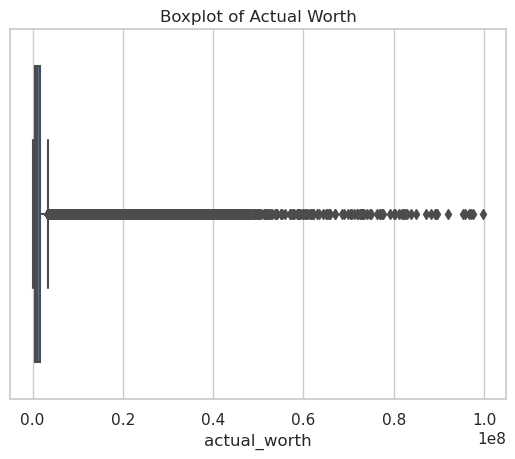

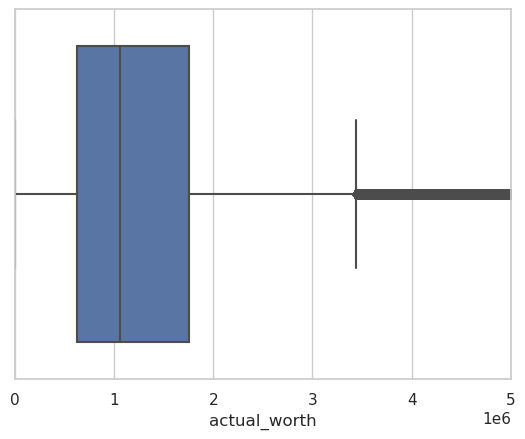

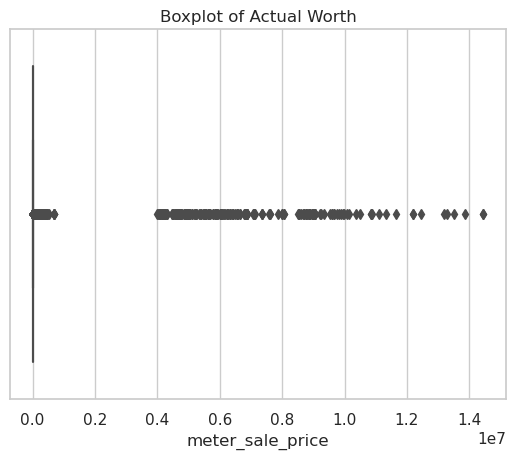

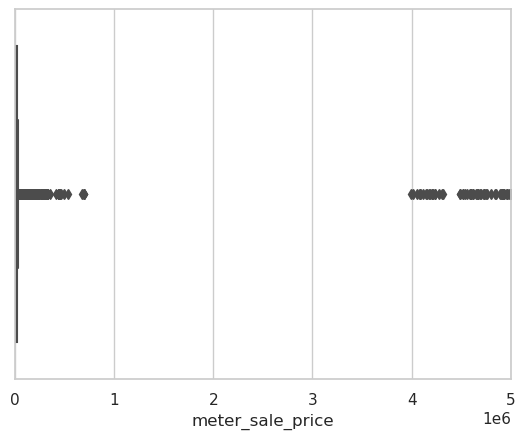

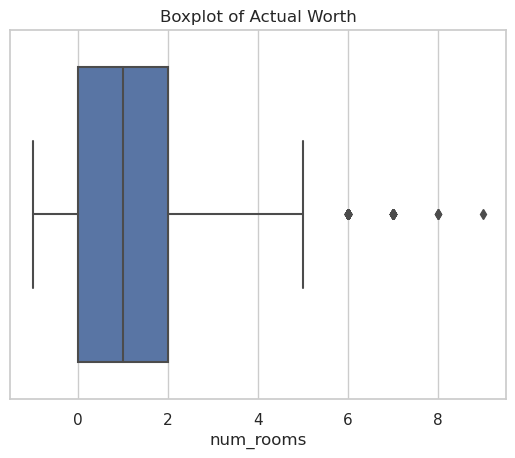

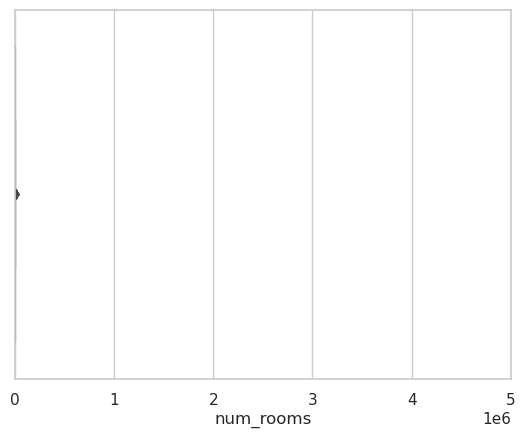

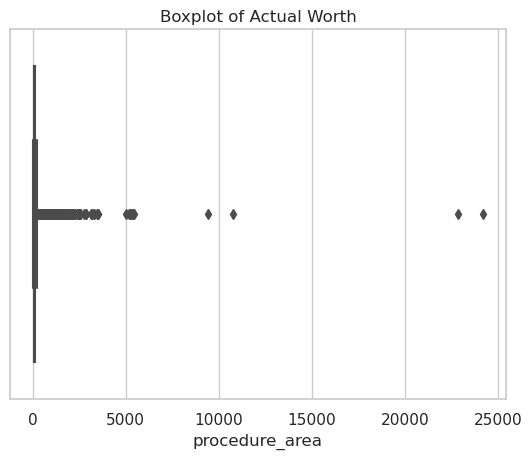

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['actual_worth'])
plt.title('Boxplot of Actual Worth')
plt.show()

sns.boxplot(x=df['actual_worth'])
plt.xlim(0, 5e6)  # Show only up to 5 million
plt.show()

sns.boxplot(x=df['meter_sale_price'])
plt.title('Boxplot of Actual Worth')
plt.show()

sns.boxplot(x=df['meter_sale_price'])
plt.xlim(0, 5e6)  # Show only up to 5 million
plt.show()

sns.boxplot(x=df['num_rooms'])
plt.title('Boxplot of Actual Worth')
plt.show()

sns.boxplot(x=df['num_rooms'])
plt.xlim(0, 5e6)  # Show only up to 5 million
plt.show()

sns.boxplot(x=df['procedure_area'])
plt.title('Boxplot of Actual Worth')
plt.show()


In [13]:
#extreme outliers in actual worth
df['actual_worth'].describe()

count    1.043003e+06
mean     2.558700e+06
std      5.971290e+06
min      1.000000e+00
25%      6.803355e+05
50%      1.246000e+06
75%      2.286888e+06
max      9.997125e+07
Name: actual_worth, dtype: float64

In [58]:
# List of numeric columns to check
columns_to_check = ['actual_worth', 'meter_sale_price', 'procedure_area', 'num_rooms']

# Create flags for each column
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    flag_col = f"{col}_outlier"
    df[flag_col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

# Sum all individual outlier flags row-wise
outlier_cols = [f"{col}_outlier" for col in columns_to_check]
df['any_outlier'] = df[outlier_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574749 entries, 875 to 1047823
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   transaction_id            574749 non-null  object 
 1   procedure_id              574749 non-null  int64  
 2   trans_group_id            574749 non-null  int64  
 3   trans_group_ar            574749 non-null  object 
 4   trans_group_en            574749 non-null  object 
 5   procedure_name_ar         574749 non-null  object 
 6   procedure_name_en         574749 non-null  object 
 7   instance_date             574749 non-null  object 
 8   property_type_id          574749 non-null  int64  
 9   property_type_ar          574749 non-null  object 
 10  property_type_en          574749 non-null  object 
 11  property_sub_type_id      574749 non-null  int64  
 12  property_sub_type_ar      574749 non-null  object 
 13  property_sub_type_en      574749 non-null  obj

In [59]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,room_type,num_rooms,actual_worth_outlier,meter_sale_price_outlier,procedure_area_outlier,num_rooms_outlier,any_outlier
875,2-105-2007-1460,105,2,رهون,Mortgages,تسجيل رهن - تسجيل مبدئى,Mortgage Pre-Registration,22-03-2010,4,فيلا,...,1.0,1.0,0.0,Bedroom,3,0,0,1,0,1
876,1-11-2011-20563,11,1,مبايعات,Sales,بيع,Sell,29-12-2011,4,فيلا,...,1.0,2.0,0.0,Bedroom,3,0,0,0,0,0
877,2-13-2020-3215,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,29-04-2020,4,فيلا,...,3.0,1.0,0.0,Bedroom,3,0,0,0,0,0
878,1-110-2021-3,110,1,مبايعات,Sales,تسجيل إيجارة تنتهى بالتملك,Lease to Own Registration,05-01-2021,4,فيلا,...,2.0,2.0,2.0,Bedroom,4,1,0,1,0,1
879,1-102-2008-19586,102,1,مبايعات,Sales,بيع - تسجيل مبدئى,Sell - Pre registration,16-12-2009,4,فيلا,...,1.0,1.0,0.0,Bedroom,3,0,0,0,0,0


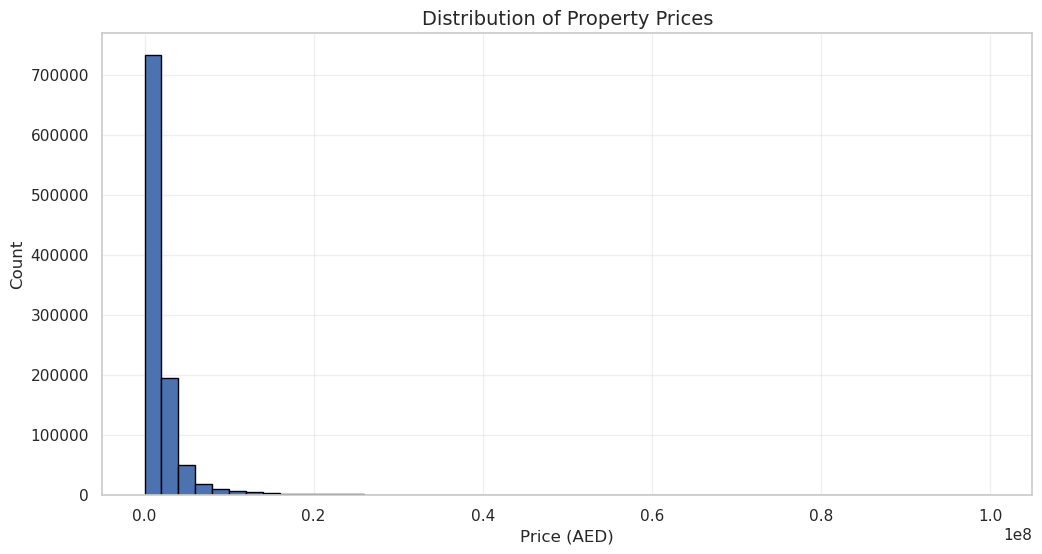

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.hist(df['actual_worth'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Property Prices', fontsize=14)
plt.xlabel('Price (AED)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

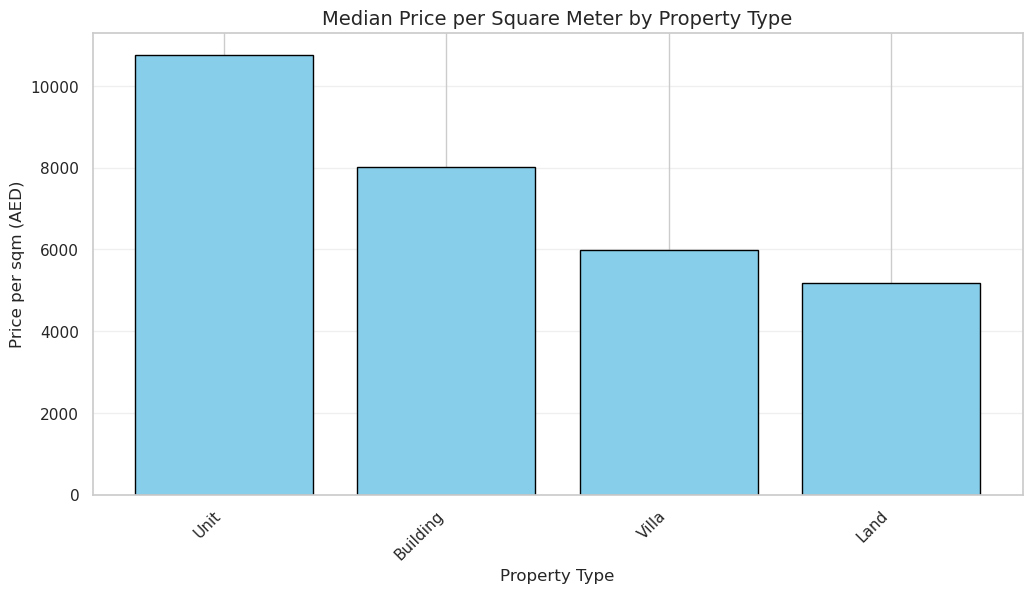

In [68]:
# Group data by property type
grouped = df.groupby('property_type_en')['meter_sale_price'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values, color='skyblue', edgecolor='black')
plt.title('Median Price per Square Meter by Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price per sqm (AED)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

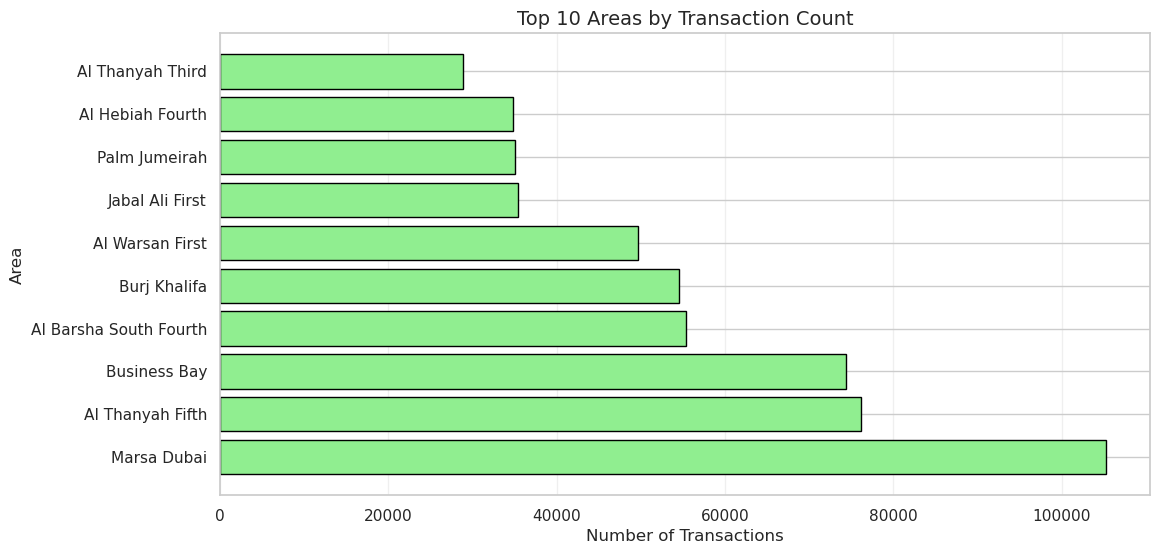

In [69]:
top_areas = df['area_name_en'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_areas.index, top_areas.values, color='lightgreen', edgecolor='black')
plt.title('Top 10 Areas by Transaction Count', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

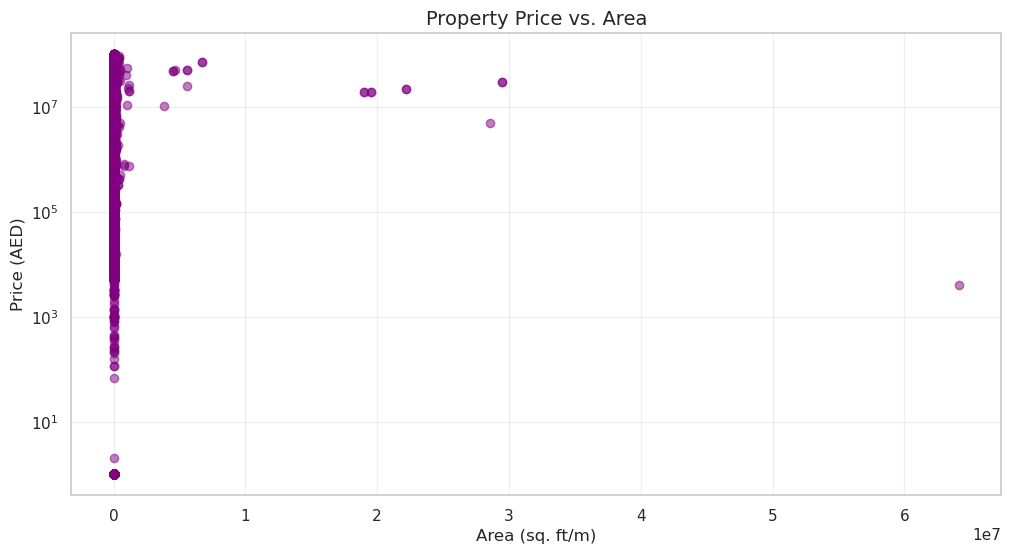

In [70]:
plt.figure(figsize=(12, 6))
plt.scatter(df['procedure_area'], df['actual_worth'], alpha=0.5, color='purple')
plt.title('Property Price vs. Area', fontsize=14)
plt.xlabel('Area (sq. ft/m)', fontsize=12)
plt.ylabel('Price (AED)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

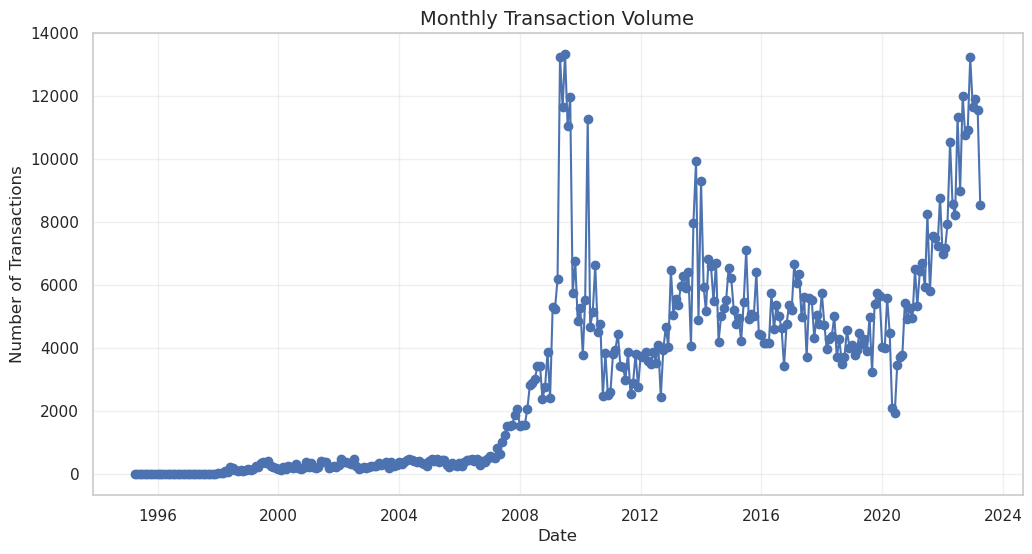

In [71]:
monthly_trans = df.resample('M', on='instance_date').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trans.index, monthly_trans.values, marker='o', linestyle='-')
plt.title('Monthly Transaction Volume', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

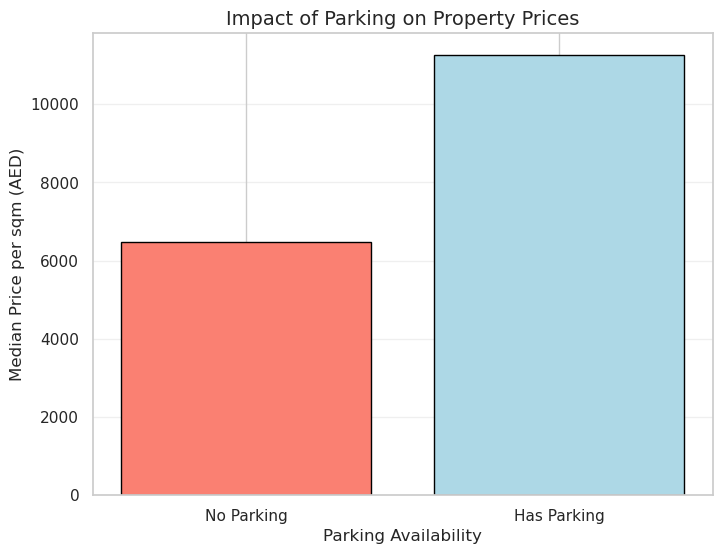

In [72]:
parking_groups = df.groupby('has_parking')['meter_sale_price'].median()

plt.figure(figsize=(8, 6))
plt.bar(['No Parking', 'Has Parking'], parking_groups.values, 
        color=['salmon', 'lightblue'], edgecolor='black')
plt.title('Impact of Parking on Property Prices', fontsize=14)
plt.xlabel('Parking Availability', fontsize=12)
plt.ylabel('Median Price per sqm (AED)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

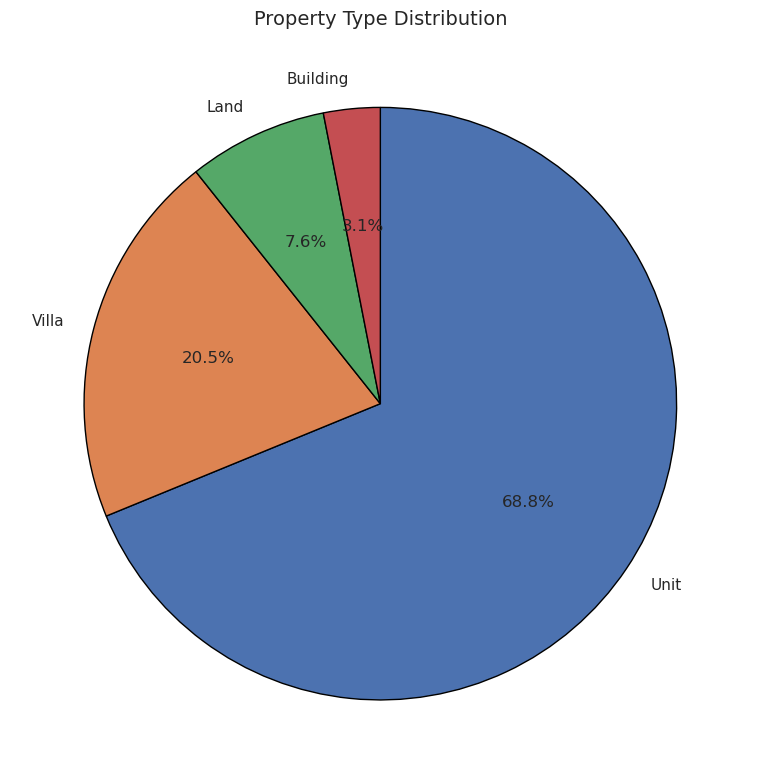

In [73]:
prop_counts = df['property_type_en'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%',
        startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})
plt.title('Property Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()

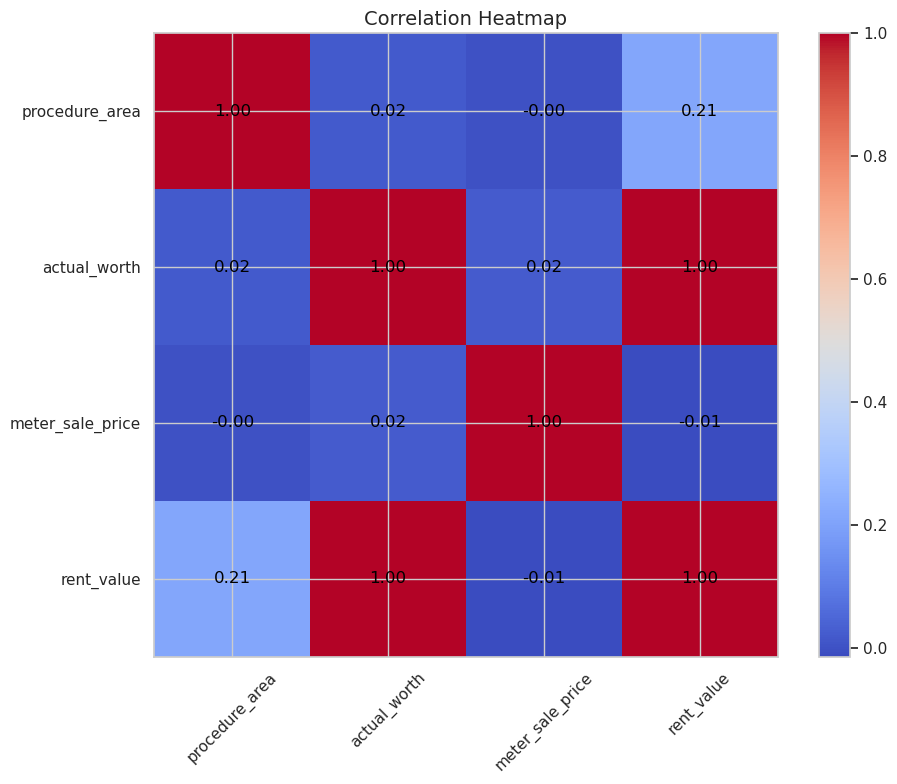

In [74]:
import numpy as np

corr = df[['procedure_area', 'actual_worth', 'meter_sale_price', 'rent_value']].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()